In [ ]:
!pip install scikit-optimize

     |████████████████████████████████| 100 kB 3.8 MB/s 


In [ ]:
!pip install pymatgen

     |████████████████████████████████| 40.6 MB 1.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 292 kB 57.8 MB/s 
     |████████████████████████████████| 65 kB 4.8 MB/s 
  Using cached numpy-1.21.5-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
     |████████████████████████████████| 109 kB 57.7 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 98 kB 9.1 MB/s 
     |████████████████████████████████| 546 kB 61.0 MB/s 
  Created wheel for pymatgen: filename=pymatgen-2022.0.17-cp37-cp37m-linux_x86_64.whl size=41841021 sha256=7320bdc6d47eeb3ee25a0ee2c06c50fc32281448daa505fefabdffc1517a3081
  Stored in directory: /root/.cache/pip/wheels/cf/f6/22/58a9be23c5f1b452770e02ff42047175eaf0f9c2f15219fc76
Successfully built pymatgen
  Attempting uninstall: nu

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import statistics as st
import itertools as it
import pickle as pkl

import scipy
import joblib
import math
import os
import re

import operator
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl

import seaborn as sns
plt.style.use('ggplot')

In [ ]:
import sklearn
sklearn.__version__

'1.0.2'

In [ ]:
#!pip uninstall scikit-learn -y
#!pip install scikit-learn==0.18.2

In [ ]:
#from sklearn.utils.fixes import MaskedArray
# replaced by
from numpy.ma import MaskedArray

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import GenericUnivariateSelect
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import VarianceThreshold

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score, auc
from sklearn.metrics import fbeta_score, make_scorer

from xgboost.sklearn import XGBRegressor

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

import xgboost as xgb
from xgboost import plot_importance
from xgboost import plot_tree

from graphviz import Graph

from scipy.stats import norm

In [ ]:
from skopt.space import Real, Categorical, Integer
from skopt.space import Categorical
from skopt.utils import use_named_args
from skopt import gp_minimize
from skopt import BayesSearchCV

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
MLdf = pd.read_pickle('/content/drive/MyDrive/ColabNotebooks/Fourth_Pass: Ale_DataBase/no-f-matminer-FeaturedData.pkl')
MLdf.head(5)

,material_id,formula,spacegroup,spacegroup_symbol,crystal_system,crossings_+-1eV,crossings_+-2eV,composition,composition_oxid,density,vpa,packing fraction,max packing efficiency,ewald_energy_per_atom,mean absolute deviation in relative bond length,mean neighbor distance variation,mean absolute deviation in relative cell size,structural complexity per atom,structural complexity per cell,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons,max ionic char,avg ionic char,HOMO_energy,LUMO_energy,gap_AO,HOMO_character,HOMO_element,LUMO_character,LUMO_element
0,mp-1111916,K2NaTiF6,225,Fm-3m,cubic,0.0,4.0,"(K, Na, Ti, F)","(K+, Na+, Ti3+, F-)",2.833639,15.414612,0.832127,0.412249,-9.397323,8.289707e-02,0.072261,1.469407e-01,1.570951,15.709506,0.346939,0.612245,0.040816,0.000000,0.917619,0.214087,-0.170010,-0.170010,0.000000,0.0,56.0,0.0,56.0
1,mp-1114332,Na3PdF6,225,Fm-3m,cubic,0.0,4.0,"(Na, Pd, F)","(Na0+, Pd0+, F0+)",3.199327,15.019607,0.585386,0.427854,0.000000,8.378608e-02,0.073153,1.491459e-01,1.570951,15.709506,0.272727,0.545455,0.181818,0.000000,0.902278,0.205192,-0.160771,-0.160771,0.000000,0.0,40.0,0.0,40.0
2,mp-1183466,Ca2PtAu,225,Fm-3m,cubic,8.0,18.0,"(Ca, Pt, Au)","(Ca0+, Pt0+, Au0+)",8.595556,22.805898,0.761536,0.680175,0.000000,5.551115e-17,0.051982,1.168354e-16,1.500000,6.000000,0.113208,0.000000,0.358491,0.528302,0.447278,0.098968,-0.141411,-0.141411,0.000000,2.0,10.0,2.0,10.0
3,mp-1184870,InAgAu2,225,Fm-3m,cubic,2.0,3.0,"(In, Ag, Au)","(In+, Ag+, Au-)",13.370065,19.145765,0.696862,0.680175,-4.347833,1.110223e-16,0.051982,1.391710e-16,1.500000,6.000000,0.067568,0.013514,0.540541,0.378378,0.134459,0.028262,-0.162334,-0.157407,0.004927,2.0,3.0,2.0,0.0
4,mp-1187434,Ti2FeTc,225,Fm-3m,cubic,26.0,112.0,"(Ti, Fe, Tc)","(Ti0+, Fe0+, Tc0+)",7.401171,13.998991,0.799845,0.680175,0.000000,1.110223e-16,0.051982,1.268918e-16,1.500000,6.000000,0.347826,0.000000,0.652174,0.000000,0.031881,0.006662,-0.183636,-0.183636,0.000000,2.0,54.0,2.0,54.0


In [ ]:
MLdf.isnull().sum()

material_id                                         0
formula                                             0
spacegroup                                          0
spacegroup_symbol                                   0
crystal_system                                      0
crossings_+-1eV                                     0
crossings_+-2eV                                     0
composition                                         0
composition_oxid                                    0
density                                             3
vpa                                                 3
packing fraction                                    3
max packing efficiency                              0
ewald_energy_per_atom                               0
mean absolute deviation in relative bond length     0
mean neighbor distance variation                    0
mean absolute deviation in relative cell size       0
structural complexity per atom                      0
structural complexity per ce

In [ ]:
MLdf = MLdf.dropna()

In [ ]:
MLdf.isnull().sum()

material_id                                        0
formula                                            0
spacegroup                                         0
spacegroup_symbol                                  0
crystal_system                                     0
crossings_+-1eV                                    0
crossings_+-2eV                                    0
composition                                        0
composition_oxid                                   0
density                                            0
vpa                                                0
packing fraction                                   0
max packing efficiency                             0
ewald_energy_per_atom                              0
mean absolute deviation in relative bond length    0
mean neighbor distance variation                   0
mean absolute deviation in relative cell size      0
structural complexity per atom                     0
structural complexity per cell                

In [ ]:
len(MLdf)

3751

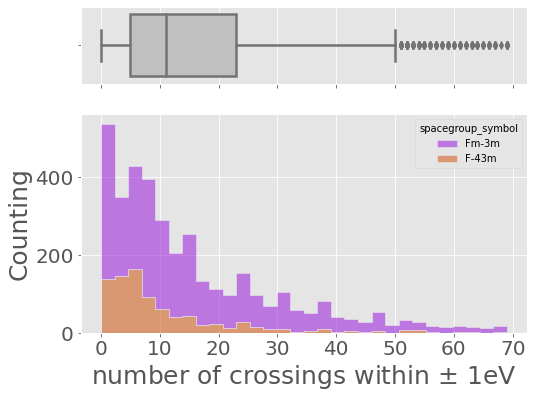

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.30, .85)}, figsize=(8, 6))

sns.boxplot(x=MLdf['crossings_+-1eV'], 
            #hue="spacegroup_symbol", 
            color='silver', 
            linewidth=2.5, 
            #showmeans=True, 
            ax=ax_box)

sns.histplot(data=MLdf, 
            x=MLdf['crossings_+-1eV'], 
            bins=30, 
            hue="spacegroup_symbol", 
            element="step", 
            stat="count", 
            multiple="stack", 
            alpha=0.5, 
            palette='gnuplot', 
            legend=True, 
            ax=ax_hist
            )


ax_box.set(xlabel='')
#ax_violin.set(xlabel='')

ax_hist.set_xlabel('number of crossings within $\pm$ 1eV', fontsize = 25)
ax_hist.set_ylabel('Counting', fontsize = 25)

ax_hist.xaxis.set_tick_params(labelsize=20, rotation=0)
ax_hist.yaxis.set_tick_params(labelsize=20, rotation=0)
ax_hist.set_xscale("linear")
ax_hist.set_yscale("linear")
#ax_hist.legend(loc='upper right')

In [ ]:
MLdf.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [ ]:
len(MLdf.columns)

32

In [ ]:
#preview the df
MLdf = MLdf.loc[:,~MLdf.columns.duplicated()]
MLdf.head(5)

,material_id,formula,spacegroup,spacegroup_symbol,crystal_system,crossings_+-1eV,crossings_+-2eV,composition,composition_oxid,density,vpa,packing fraction,max packing efficiency,ewald_energy_per_atom,mean absolute deviation in relative bond length,mean neighbor distance variation,mean absolute deviation in relative cell size,structural complexity per atom,structural complexity per cell,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons,max ionic char,avg ionic char,HOMO_energy,LUMO_energy,gap_AO,HOMO_character,HOMO_element,LUMO_character,LUMO_element
0,mp-1111916,K2NaTiF6,225,Fm-3m,cubic,0.0,4.0,"(K, Na, Ti, F)","(K+, Na+, Ti3+, F-)",2.833639,15.414612,0.832127,0.412249,-9.397323,8.289707e-02,0.072261,1.469407e-01,1.570951,15.709506,0.346939,0.612245,0.040816,0.000000,0.917619,0.214087,-0.170010,-0.170010,0.000000,0.0,56.0,0.0,56.0
1,mp-1114332,Na3PdF6,225,Fm-3m,cubic,0.0,4.0,"(Na, Pd, F)","(Na0+, Pd0+, F0+)",3.199327,15.019607,0.585386,0.427854,0.000000,8.378608e-02,0.073153,1.491459e-01,1.570951,15.709506,0.272727,0.545455,0.181818,0.000000,0.902278,0.205192,-0.160771,-0.160771,0.000000,0.0,40.0,0.0,40.0
2,mp-1183466,Ca2PtAu,225,Fm-3m,cubic,8.0,18.0,"(Ca, Pt, Au)","(Ca0+, Pt0+, Au0+)",8.595556,22.805898,0.761536,0.680175,0.000000,5.551115e-17,0.051982,1.168354e-16,1.500000,6.000000,0.113208,0.000000,0.358491,0.528302,0.447278,0.098968,-0.141411,-0.141411,0.000000,2.0,10.0,2.0,10.0
3,mp-1184870,InAgAu2,225,Fm-3m,cubic,2.0,3.0,"(In, Ag, Au)","(In+, Ag+, Au-)",13.370065,19.145765,0.696862,0.680175,-4.347833,1.110223e-16,0.051982,1.391710e-16,1.500000,6.000000,0.067568,0.013514,0.540541,0.378378,0.134459,0.028262,-0.162334,-0.157407,0.004927,2.0,3.0,2.0,0.0
4,mp-1187434,Ti2FeTc,225,Fm-3m,cubic,26.0,112.0,"(Ti, Fe, Tc)","(Ti0+, Fe0+, Tc0+)",7.401171,13.998991,0.799845,0.680175,0.000000,1.110223e-16,0.051982,1.268918e-16,1.500000,6.000000,0.347826,0.000000,0.652174,0.000000,0.031881,0.006662,-0.183636,-0.183636,0.000000,2.0,54.0,2.0,54.0


In [ ]:
len(MLdf.columns)

32

In [ ]:
list(MLdf.columns)

['material_id',
 'formula',
 'spacegroup',
 'spacegroup_symbol',
 'crystal_system',
 'crossings_+-1eV',
 'crossings_+-2eV',
 'composition',
 'composition_oxid',
 'density',
 'vpa',
 'packing fraction',
 'max packing efficiency',
 'ewald_energy_per_atom',
 'mean absolute deviation in relative bond length',
 'mean neighbor distance variation',
 'mean absolute deviation in relative cell size',
 'structural complexity per atom',
 'structural complexity per cell',
 'frac s valence electrons',
 'frac p valence electrons',
 'frac d valence electrons',
 'frac f valence electrons',
 'max ionic char',
 'avg ionic char',
 'HOMO_energy',
 'LUMO_energy',
 'gap_AO',
 'HOMO_character',
 'HOMO_element',
 'LUMO_character',
 'LUMO_element']

In [ ]:
X = MLdf.drop(['material_id',
 'formula',
 'spacegroup',
 'spacegroup_symbol',
 'crystal_system',
 'crossings_+-1eV',
 'crossings_+-2eV',
 'composition',
 'composition_oxid',
 #'density',
 #'vpa',
 #'packing fraction',
 #'max packing efficiency',
 #'ewald_energy_per_atom',
 #'mean absolute deviation in relative bond length',
 #'mean neighbor distance variation',
 #'mean absolute deviation in relative cell size',
 #'structural complexity per atom',
 #'structural complexity per cell',
 #'frac s valence electrons',
 #'frac p valence electrons',
 #'frac d valence electrons',
 #'frac f valence electrons',
 #'max ionic char',
 #'avg ionic char',
 #'HOMO_energy',
 #'LUMO_energy',
 #'gap_AO',
 #'HOMO_character',
 #'HOMO_element',
 #'LUMO_character',
 #'LUMO_element'
 ], 
 axis=1)
X.head(5)

,density,vpa,packing fraction,max packing efficiency,ewald_energy_per_atom,mean absolute deviation in relative bond length,mean neighbor distance variation,mean absolute deviation in relative cell size,structural complexity per atom,structural complexity per cell,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons,max ionic char,avg ionic char,HOMO_energy,LUMO_energy,gap_AO,HOMO_character,HOMO_element,LUMO_character,LUMO_element
0,2.833639,15.414612,0.832127,0.412249,-9.397323,8.289707e-02,0.072261,1.469407e-01,1.570951,15.709506,0.346939,0.612245,0.040816,0.000000,0.917619,0.214087,-0.170010,-0.170010,0.000000,0.0,56.0,0.0,56.0
1,3.199327,15.019607,0.585386,0.427854,0.000000,8.378608e-02,0.073153,1.491459e-01,1.570951,15.709506,0.272727,0.545455,0.181818,0.000000,0.902278,0.205192,-0.160771,-0.160771,0.000000,0.0,40.0,0.0,40.0
2,8.595556,22.805898,0.761536,0.680175,0.000000,5.551115e-17,0.051982,1.168354e-16,1.500000,6.000000,0.113208,0.000000,0.358491,0.528302,0.447278,0.098968,-0.141411,-0.141411,0.000000,2.0,10.0,2.0,10.0
3,13.370065,19.145765,0.696862,0.680175,-4.347833,1.110223e-16,0.051982,1.391710e-16,1.500000,6.000000,0.067568,0.013514,0.540541,0.378378,0.134459,0.028262,-0.162334,-0.157407,0.004927,2.0,3.0,2.0,0.0
4,7.401171,13.998991,0.799845,0.680175,0.000000,1.110223e-16,0.051982,1.268918e-16,1.500000,6.000000,0.347826,0.000000,0.652174,0.000000,0.031881,0.006662,-0.183636,-0.183636,0.000000,2.0,54.0,2.0,54.0


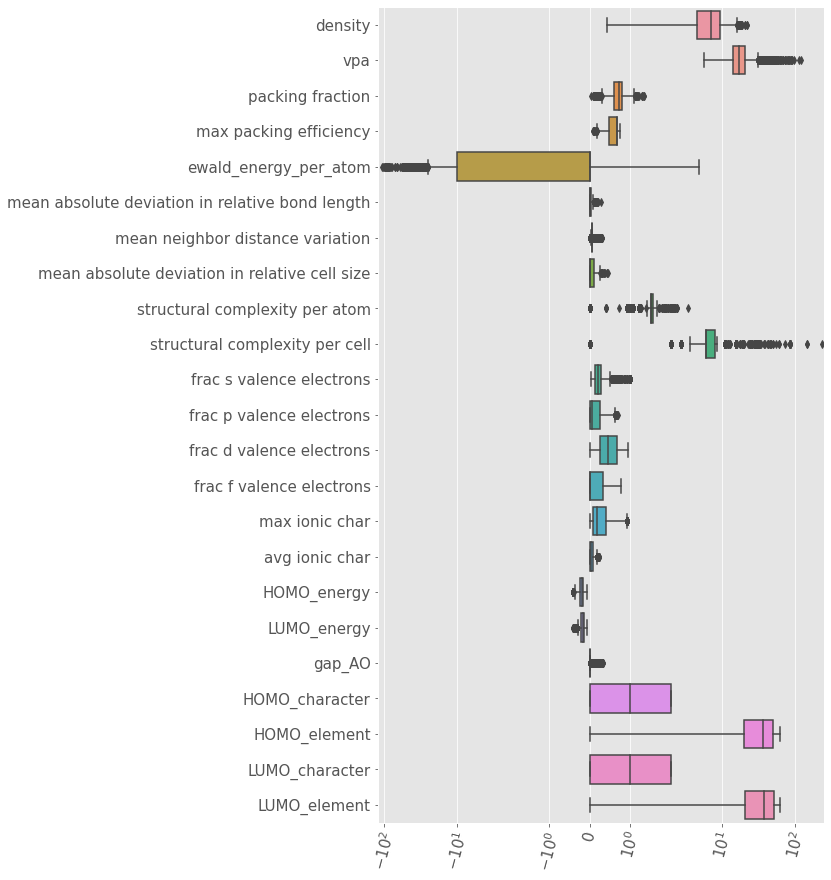

In [ ]:
fig, ax = plt.subplots(figsize =(8, 15))
ax = sns.boxplot(data=X, orient='h')
plt.tick_params(axis='both', labelsize = 15)
plt.xscale('symlog')
plt.yticks(rotation=0)
plt.xticks(rotation=75);

In [ ]:
Xscaled = RobustScaler(with_centering=True, 
                       with_scaling=True, 
                       quantile_range=(25.0, 75.0)
                       #with_mean=True, 
                       #with_std=True
                       ).fit_transform(X)
Xscaled

array([[-0.89945495, -0.23871247,  0.55237128, ...,  0.63333333,
        -0.5       ,  0.6       ],
       [-0.82087174, -0.29822565, -0.66684961, ...,  0.1       ,
        -0.5       ,  0.06666667],
       [ 0.33873214,  0.87489077,  0.2035596 , ..., -0.9       ,
         0.5       , -0.93333333],
       ...,
       [ 0.46919371, -0.2305293 , -0.15188555, ...,  0.63333333,
        -0.5       ,  0.6       ],
       [-0.52968431,  0.23776406, -1.62410556, ..., -1.16666667,
         0.        , -1.2       ],
       [-0.05706615, -0.79478929,  0.53621441, ..., -0.63333333,
         0.5       , -0.66666667]])

In [ ]:
np.std(Xscaled, axis=0)

array([ 0.74684266,  1.37317552,  0.83686628,  0.67170108,  1.5411414 ,
        0.94882408,  5.99903649,  0.65456571,  4.14709148,  4.48568569,
        1.02188196,  0.73962705,  0.57087299,  0.62584434,  0.88823214,
        0.92639723,  0.73972759,  0.99351044, 22.60920359,  0.41807448,
        0.59473158,  0.4380736 ,  0.60037338])

In [ ]:
np.mean(Xscaled, axis=0)

array([ 0.06314342,  0.34285647, -0.14691483, -0.54007048, -0.86573558,
        0.63750488,  1.23258398,  0.46322281, -0.55162701,  1.11004888,
        0.21741281,  0.35889611, -0.02114596,  0.47058779,  0.34989374,
        0.38044697, -0.14073698, -0.19659444,  8.85569802, -0.05971741,
       -0.06800853, -0.01932818, -0.08192482])

In [ ]:
Xscaled_df = pd.DataFrame(data=Xscaled, columns=list(X))
Xscaled_df.head(5)

,density,vpa,packing fraction,max packing efficiency,ewald_energy_per_atom,mean absolute deviation in relative bond length,mean neighbor distance variation,mean absolute deviation in relative cell size,structural complexity per atom,structural complexity per cell,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons,max ionic char,avg ionic char,HOMO_energy,LUMO_energy,gap_AO,HOMO_character,HOMO_element,LUMO_character,LUMO_element
0,-0.899455,-0.238712,0.552371,-1.347132e+00,-0.923733,2.225000e+00,3.550637e+00,1.410631e+00,1.0,4.854753,0.963957,2.198980,-0.976890,0.000000,2.193789,2.591523,0.240451,0.090734,0.000000,-0.5,0.633333,-0.5,0.600000
1,-0.820872,-0.298226,-0.666850,-1.268673e+00,0.000000,2.248862e+00,3.706651e+00,1.431800e+00,1.0,4.854753,0.453135,1.931818,-0.649493,0.000000,2.148183,2.463587,0.343879,0.245486,0.000000,-0.5,0.100000,-0.5,0.066667
2,0.338732,0.874891,0.203560,1.674662e-15,0.000000,-2.979896e-15,-2.429742e-15,-7.045575e-16,0.0,0.000000,-0.644893,-0.250000,-0.239271,1.584906,0.795587,0.935797,0.560608,0.569763,0.000000,0.5,-0.900000,0.5,-0.933333
3,1.364734,0.323439,-0.116015,2.232883e-15,-0.427381,-1.489948e-15,-3.644613e-15,-4.901353e-16,0.0,0.000000,-0.959048,-0.195946,0.183438,1.135135,-0.134344,-0.081150,0.326381,0.301832,2.582285,0.5,-1.133333,0.5,-1.266667
4,0.082069,-0.451996,0.392859,1.674662e-15,0.000000,-1.489948e-15,-4.859484e-15,-6.080158e-16,0.0,0.000000,0.970065,-0.250000,0.442644,0.000000,-0.439282,-0.391807,0.087912,-0.137500,0.000000,0.5,0.566667,0.5,0.533333


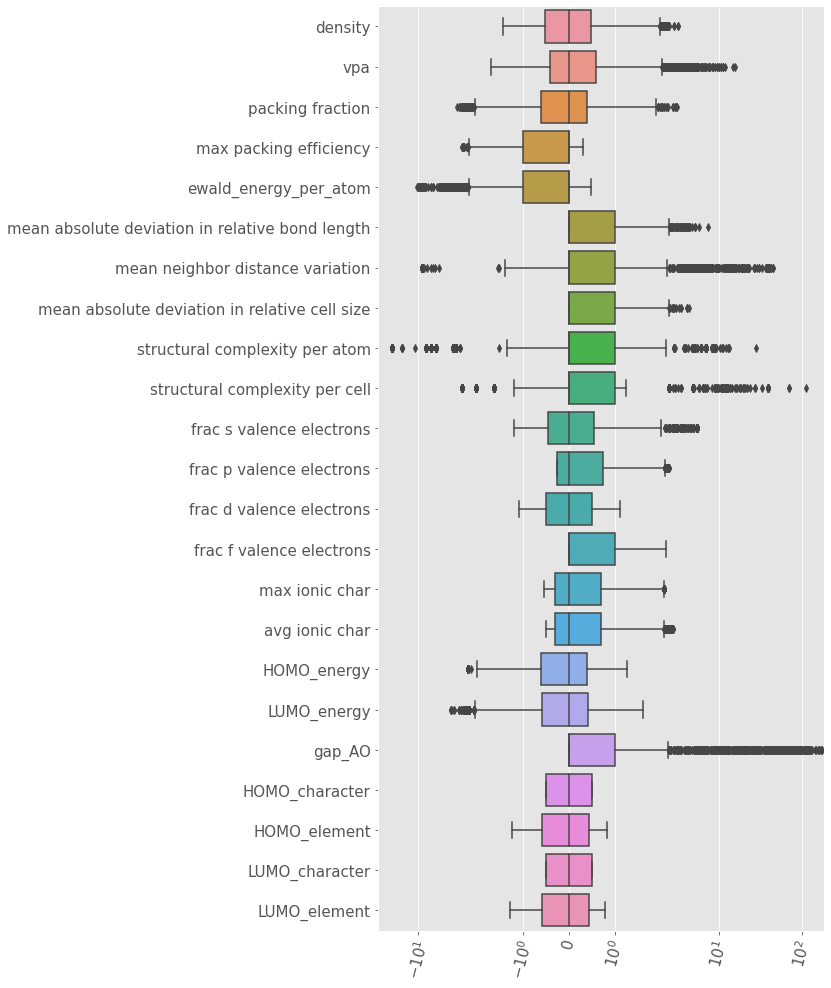

In [ ]:
fig, ax = plt.subplots(figsize =(8, 17))
ax = sns.boxplot(data=Xscaled_df, orient='h')
plt.tick_params(axis='both', labelsize = 15)
plt.xscale('symlog')
plt.yticks(rotation=0)
plt.xticks(rotation=75);

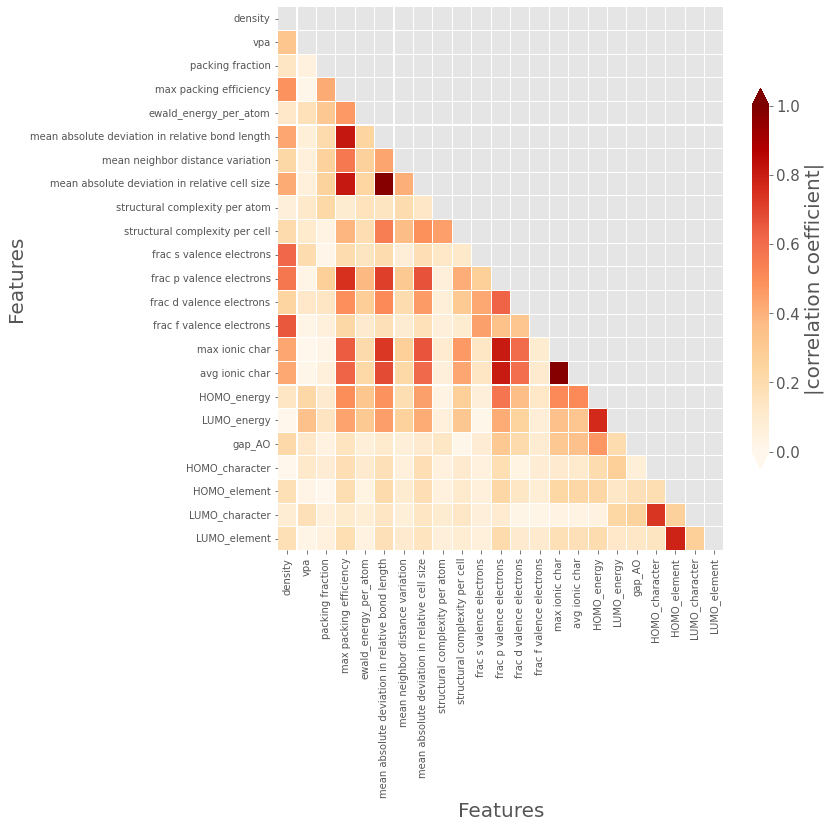

In [ ]:
matrix = np.triu(Xscaled_df.corr(method ='pearson').abs())

f, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(Xscaled_df.corr(method ='pearson').abs(), 
                 mask=matrix, 
                 cmap='OrRd', 
                 linecolor='white', 
                 linewidths=0.1, 
                 #annot=True, 
                 #annot_kws={'fontsize': 10, 
                       #'weight': 'bold'
                 #     }, 
                 #fmt='.2f', 
                 vmin=0, 
                 vmax=1, 
                 cbar_kws={'label': '|correlation coefficient|',  
                           'extend': 'both', 
                           'shrink':0.7}
                )

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
ax.figure.axes[-1].yaxis.label.set_size(20)

ax.yaxis.set_tick_params(labelsize=10)
ax.xaxis.set_tick_params(labelsize=10)

ax.set_ylabel('Features', fontsize = 20)
ax.set_xlabel('Features', fontsize = 20);
#f.savefig('Feature_Correlation.png', bbox_inches='tight', dpi=400);

In [ ]:
y = MLdf['crossings_+-1eV']
y.head(5)

0     0.0
1     0.0
2     8.0
3     2.0
4    26.0
Name: crossings_+-1eV, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xscaled_df, y, 
                                                    test_size=0.3, 
                                                    shuffle=True, 
                                                    random_state=1
                                                   )

In [ ]:
df_y_train = pd.DataFrame(y_train)
df_y_train.head(5)

,crossings_+-1eV
1089,5.0
3783,46.0
2716,4.0
1660,21.0
611,20.0


In [ ]:
df_y_test = pd.DataFrame(y_test)
df_y_test.head(5)

,crossings_+-1eV
1457,39.0
3095,1.0
323,11.0
2802,13.0
102,13.0


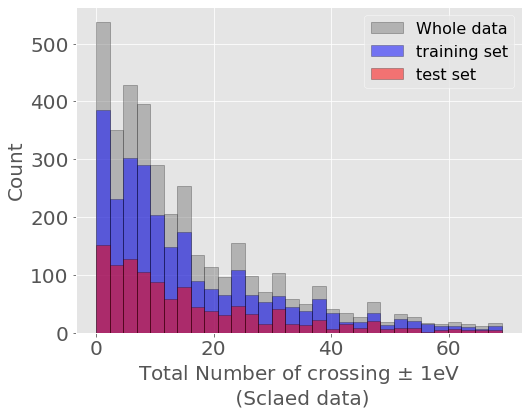

In [ ]:
fig, ax = plt.subplots(figsize =(8, 6))
plt.hist(MLdf['crossings_+-1eV'], 
         color = 'grey', 
         edgecolor = 'black',
         bins = 30, 
         alpha=0.5, 
         label='Whole data')

plt.hist(y_train, 
         color = 'blue', 
         edgecolor = 'black',
         bins = 30, 
         alpha=0.5,
         label='training set')

plt.hist(y_test, 
         color = 'red', 
         edgecolor = 'black',
         bins = 30, 
         alpha=0.5, 
         label='test set')

plt.xlabel('Total Number of crossing $\pm$ 1eV\n (Sclaed data)', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.legend(loc='upper right', fontsize = 16, ncol = 1).get_frame().set_edgecolor('w')
plt.grid(True)

plt.tick_params(axis='both', labelsize = 20)

https://www.kaggle.com/tilii7/hyperparameter-grid-search-with-xgboost

In [ ]:
estimator = xgb.XGBRegressor()

print(estimator.get_params().keys())

param_grid   = {"booster":           ['gbtree'], 
                'objective':         ['reg:squarederror'],
                "learning_rate":     (0.01, 3.0, "uniform"),  
                "max_depth":         (1, 50, "uniform"), 
                "max_delta_step":    (0, 10.0, "uniform"), 
                "subsample":         (0.01, 1.0, "uniform"), 
                "colsample_bytree":  (0.01, 1.0, "uniform"), 
                "colsample_bylevel": (0.01, 1.0, "uniform"), 
                "reg_lambda":        (1, 1000, "uniform"), 
                "reg_alpha":         (1e-9, 3.0, "uniform"), 
                "gamma":             (1e-9, 3.0, "uniform"), 
                "min_child_weight":  (0, 10, "uniform"),  
                "scale_pos_weight":  (1, 500, "uniform")
                }

ss = ShuffleSplit(n_splits=7, test_size=0.30, random_state=0)

gbm = BayesSearchCV(estimator=estimator, 
                    search_spaces=param_grid, 
                    cv=ss, 
                    n_iter=150, 
                    n_points=10, 
                    optimizer_kwargs={'base_estimator': 'GBRT', 
                                      'acq_optimizer': 'sampling',
                                      'initial_point_generator':'grid'
                                      }, 
                    #iid=False, 
                    verbose=0, 
                    n_jobs=-1, 
                    refit=True)

gbm.fit(X_train, y_train)
best = gbm.best_estimator_;

dict_keys(['base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'importance_type', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'n_estimators', 'n_jobs', 'nthread', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'seed', 'silent', 'subsample', 'verbosity'])


In [ ]:
# save the model to disk
pkl.dump(best, open('/content/drive/MyDrive/ColabNotebooks/Fourth_Pass: Ale_DataBase/Features_Matminer/ML_model.sav', 'wb'))

In [ ]:
estimator.importance_type

'gain'

In [ ]:
df0 = pd.DataFrame(gbm.cv_results_)
df0.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_booster,param_colsample_bylevel,param_colsample_bytree,param_gamma,param_learning_rate,param_max_delta_step,param_max_depth,param_min_child_weight,param_objective,param_reg_alpha,param_reg_lambda,param_scale_pos_weight,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score
0,0.886844,0.119139,0.021328,0.006578,gbtree,0.7525,0.505,1.5,2.2525,2,38,2,reg:squarederror,2.25,500,375,0.2575,"{'booster': 'gbtree', 'colsample_bylevel': 0.7...",-0.254841,-0.246546,-0.306484,-0.335139,-0.163569,-0.256744,-0.359936,-0.274751,0.060696,129
1,0.712511,0.099724,0.024893,0.010340,gbtree,0.2575,0.7525,0.75,2.2525,2,38,8,reg:squarederror,1.5,500,126,0.505,"{'booster': 'gbtree', 'colsample_bylevel': 0.2...",0.217699,0.237380,0.182776,0.118054,0.161650,0.176155,0.129192,0.174701,0.040169,108
2,0.497498,0.086794,0.030341,0.012314,gbtree,0.2575,0.2575,0.75,1.505,8,13,5,reg:squarederror,0.75,500,375,0.7525,"{'booster': 'gbtree', 'colsample_bylevel': 0.2...",0.326346,0.348841,0.295244,0.345076,0.308717,0.335287,0.306191,0.323672,0.019165,67
3,0.870803,0.144850,0.021838,0.005361,gbtree,0.505,0.505,2.25,0.7575,2,38,5,reg:squarederror,0.75,750,126,0.505,"{'booster': 'gbtree', 'colsample_bylevel': 0.5...",0.344806,0.401856,0.333100,0.325054,0.347962,0.412468,0.359990,0.360748,0.031217,30
4,1.245995,0.129366,0.016702,0.005218,gbtree,0.505,0.7525,0.75,2.2525,2,13,5,reg:squarederror,0.75,251,126,0.7525,"{'booster': 'gbtree', 'colsample_bylevel': 0.5...",0.291683,0.337204,0.241393,0.231093,0.227099,0.297899,0.252351,0.268389,0.038230,88


In [ ]:
gbm.best_params_

OrderedDict([('booster', 'gbtree'),
             ('colsample_bylevel', 0.9494571508270323),
             ('colsample_bytree', 0.8407728783765672),
             ('gamma', 0.7052177556471775),
             ('learning_rate', 0.9964952903184573),
             ('max_delta_step', 1),
             ('max_depth', 34),
             ('min_child_weight', 2),
             ('objective', 'reg:squarederror'),
             ('reg_alpha', 0.3858232509875745),
             ('reg_lambda', 374),
             ('scale_pos_weight', 74),
             ('subsample', 0.8953524510559879)])

In [ ]:
gbm.best_index_

112

In [ ]:
gbm.n_splits_

7

In [ ]:
gbm.multimetric_

False

In [ ]:
y_pred_train = best.predict(X_train)
y_pred_train

array([ 8.680304 , 42.9622   ,  4.019249 , ..., 21.35049  ,  1.4893734,
       -0.2903226], dtype=float32)

In [ ]:
y_pred_test = best.predict(X_test)

The rmse train: 2.8097081220981246
The rmse test: 11.205942220509343
The MAE train: 1.7127017863023848
The MAE test: 7.7334176004726976
The R^2 train: 0.9639138974558565
The R^2 test: 0.42970340503662185


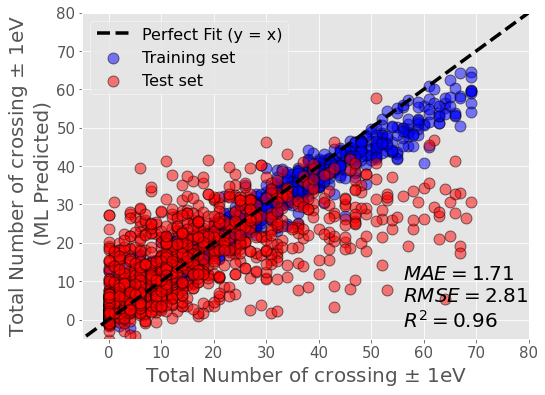

In [ ]:
x_ref_line = [-10, 100]
y_ref_line = [-10, 100]

x_ref_line_2 = np.linspace(-10, 10, 100)
y_ref_line_2 = np.linspace(-10, 10, 100)

# Print Result and Output figure
x1 = np.array(y_train)
y1 = np.array(y_pred_train)
x2 = np.array(y_test)
y2 = np.array(y_pred_test)

print('The rmse train:', mean_squared_error(y_train, y_pred_train, squared=False))
print('The rmse test:', mean_squared_error(y_test, y_pred_test, squared=False))
print('The MAE train:', mean_absolute_error(y_train, y_pred_train))
print('The MAE test:', mean_absolute_error(y_test, y_pred_test))
print('The R^2 train:', r2_score(y_train, y_pred_train))
print('The R^2 test:', r2_score(y_test, y_pred_test))

fig = plt.figure(figsize=(8, 6))
#plt.fill_between(x_ref_line_2, y_ref_line_2 - 1.0, y_ref_line_2 + 1.0, 
#                 color = '#546223', alpha=0.3, label='+/- 1eV')

z = np.polyfit(x1, y1, 1)
p = np.poly1d(z)
plt.plot(x_ref_line, y_ref_line, 'k--', linewidth=3.5, label='Perfect Fit (y = x)')
#plt.plot(x1,p(x1),'--', color = 'dodgerblue', linewidth=3.5, label='Best Fit')

plt.scatter(x1, y1, s=120, c='blue', alpha=0.5, edgecolors='k', linewidths=1, label='Training set')
plt.scatter(x2, y2, s=120, c='red', alpha=0.5, edgecolors='k', linewidths=1, label='Test set')

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.xlabel('Total Number of crossing $\pm$ 1eV', fontsize = 20)
plt.ylabel('Total Number of crossing $\pm$ 1eV \n (ML Predicted)', fontsize = 20)
plt.tick_params(axis='both', labelsize = 15)
plt.legend(loc='upper left', fontsize = 16, ncol = 1).get_frame().set_edgecolor('w')
plt.grid(True)

plt.xlim(-5, 80)
plt.ylim(-5, 80);
text_kwargs = dict(fontsize=20, 
                   #ha='center', 
                   #va='center', 
                   color='k'
                  )

plt.text(56, -2, 
         (r'$MAE={:.2f}$' + '\n' + r'$RMSE={:.2f}$' + '\n' + r'$R^2={:.2f}$').format(mean_absolute_error(y_train, y_pred_train), 
                                                                                               mean_squared_error(y_train, y_pred_train, squared=False), 
                                                                                               r2_score(y_train, y_pred_train)
                                                                                              ), **text_kwargs
        );

In [ ]:
residuals_training = [y_train_i - y_pred_train_i for y_train_i, y_pred_train_i in zip(y_train, y_pred_train)]
#error_training

In [ ]:
residuals_testing = [y_test_i - y_pred_test_i for y_test_i, y_pred_test_i in zip(y_test, y_pred_test)]
#error_testing

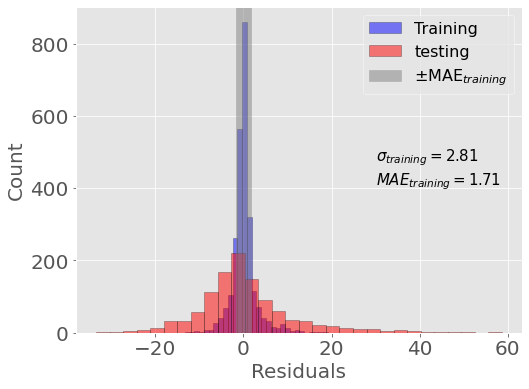

In [ ]:
fig, ax = plt.subplots(figsize =(8, 6))

plt.hist(residuals_training, 
         color = 'blue', 
         edgecolor = 'black',
         bins = 30, 
         alpha=0.5,
         label='Training')

plt.hist(residuals_testing, 
         color = 'red', 
         edgecolor = 'black',
         bins = 30, 
         alpha=0.5, 
         label='testing')

ax.axvspan(-mean_absolute_error(y_train, y_pred_train), 
            mean_absolute_error(y_train, y_pred_train), 
            alpha=0.5, 
            color='grey', 
            label='$\pm$MAE$_{training}$')

plt.legend(loc='upper right', fontsize = 16, ncol = 1).get_frame().set_edgecolor('w')
plt.xlabel('Residuals', fontsize = 20)
plt.ylabel('Count', fontsize = 20)

text_kwargs = dict(fontsize=15, 
                   #ha='center', 
                   #va='center', 
                   #color='gray'
                  )

ax.text(30, 410, 
        (r'$\sigma_{1}={0:.2f}$' + '\n' + r'$MAE_{1}={2:.2f}$' ).format(np.std(residuals_training), 
                                         '{training}', 
                                         mean_absolute_error(y_train, y_pred_train)
                                        ), 
        **text_kwargs)



plt.tick_params(axis='both', labelsize = 20);

# Feature Importances

In [ ]:
imp = pd.DataFrame(best.feature_importances_, 
                   columns = ['Importance'], 
                   index = Xscaled_df.columns)

imp = imp.sort_values(['Importance'], ascending = False)
imp

,Importance
structural complexity per cell,0.202280
LUMO_energy,0.081434
HOMO_character,0.062225
HOMO_element,0.059271
HOMO_energy,0.052739
avg ionic char,0.050592
structural complexity per atom,0.044498
LUMO_character,0.039613
frac f valence electrons,0.038700
frac p valence electrons,0.038140


In [ ]:
imp['Features'] = imp.index
imp

,Importance,Features
structural complexity per cell,0.202280,structural complexity per cell
LUMO_energy,0.081434,LUMO_energy
HOMO_character,0.062225,HOMO_character
HOMO_element,0.059271,HOMO_element
HOMO_energy,0.052739,HOMO_energy
avg ionic char,0.050592,avg ionic char
structural complexity per atom,0.044498,structural complexity per atom
LUMO_character,0.039613,LUMO_character
frac f valence electrons,0.038700,frac f valence electrons
frac p valence electrons,0.038140,frac p valence electrons


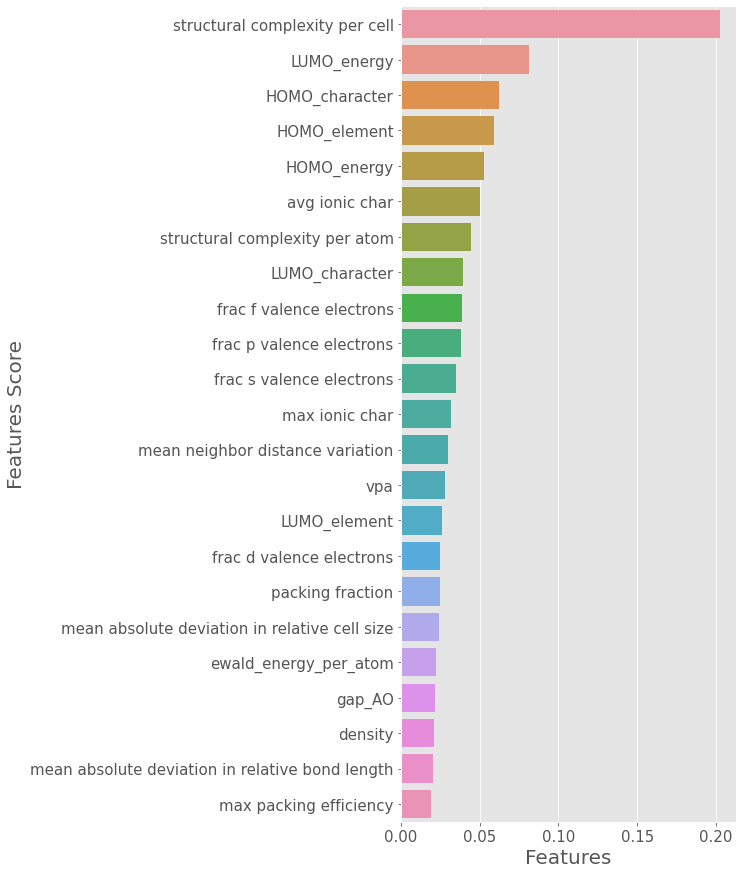

In [ ]:
fig = plt.figure(figsize=(6, 15))

ax = sns.barplot(y="Features", x="Importance", data=imp)
#ax.axhline(0.125, color='b', lw=3)

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.xlabel('Features', fontsize = 20)
plt.ylabel('Features Score', fontsize = 20)
plt.tick_params(axis='both', labelsize = 15)
plt.tick_params(axis='y', rotation = 0)
#plt.ylim(0, 0.2);

# Reduce Model

In [ ]:
regressors = []
MSE_train  = []
MAE_train  = []
R2_train   = []

MSE_test   = []
MAE_test   = []
R2_test    = []

for n in range(len(imp)):
    regressors.append(n)
    regressor = list(imp['Features'][0:n+1])
    features = Xscaled_df[regressor]
    
    X_train0, X_test0, y_train0, y_test0 = train_test_split(features, y, test_size=0.3, random_state=1)
    #loaded_model = pkl.load(open('/content/drive/MyDrive/ColabNotebooks/Fourth_Pass: Ale_DataBase/ML_model.sav', 'rb'))
    #result = loaded_model.score(X_test, Y_test)

    gs = pkl.load(open('/content/drive/MyDrive/ColabNotebooks/Fourth_Pass: Ale_DataBase/Features_Matminer/ML_model.sav', 'rb'))   
    gs.fit(X_train0, y_train0)

    y_pred_train0 = gs.predict(X_train0)
    y_pred_test0  = gs.predict(X_test0)

    MSE_train0 = mean_squared_error(y_train0, y_pred_train0) ** 0.5
    MSE_test0  = mean_squared_error(y_test0, y_pred_test0) ** 0.5
    MAE_train0 = mean_absolute_error(y_train0, y_pred_train0)
    MAE_test0  = mean_absolute_error(y_test0, y_pred_test0)
    r20_train0 = r2_score(y_train0, y_pred_train0)
    r20_test0  = r2_score(y_test0, y_pred_test0)
    
    MSE_train.append(MSE_train0)
    MAE_train.append(MAE_train0)
    R2_train.append(r20_train0)
    
    MSE_test.append(MSE_test0)
    MAE_test.append(MAE_test0)
    R2_test.append(r20_test0)



In [ ]:
regressors = [x+1 for x in regressors]
regressors

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [ ]:
min(MAE_test)-5.0

2.5111731764848875

''

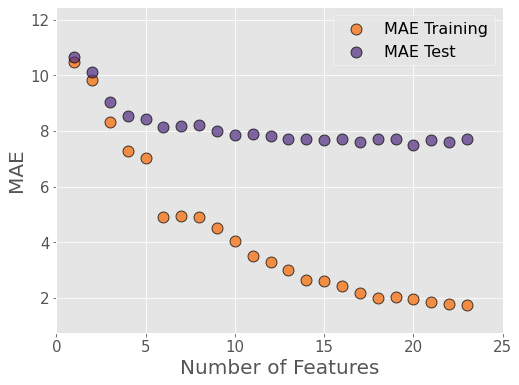

In [ ]:
fig = plt.figure(figsize=(8, 6))

plt.scatter(regressors, MAE_train, s=120, c='#F56600', alpha=0.7, edgecolors='k', linewidths=1, label='MAE Training')
plt.scatter(regressors, MAE_test, s=120, c='#522D80', alpha=0.7, edgecolors='k', linewidths=1, label='MAE Test')

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

plt.xlabel('Number of Features', fontsize = 20)
plt.ylabel('MAE', fontsize = 20)

plt.tick_params(axis='both', labelsize = 15)
plt.legend(loc='upper right', fontsize = 16, ncol = 1).get_frame().set_edgecolor('w')
plt.grid(True)

plt.xlim(0, 25)
plt.ylim(min(MAE_train)-1.0, max(MAE_train)+2.0)
;

(-0.26996714338174044, 1.0)

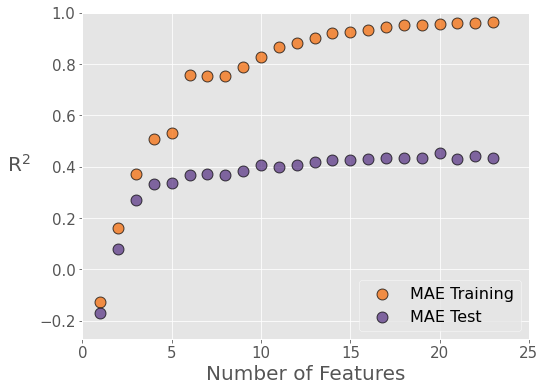

In [ ]:
fig = plt.figure(figsize=(8, 6))

plt.scatter(regressors, R2_train, s=120, c='#F56600', alpha=0.7, edgecolors='k', linewidths=1, label='MAE Training')
plt.scatter(regressors, R2_test, s=120, c='#522D80', alpha=0.7, edgecolors='k', linewidths=1, label='MAE Test')

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

plt.xlabel('Number of Features', fontsize = 20)
plt.ylabel('R$^2$', fontsize = 20, rotation = 0, labelpad= 20)

plt.tick_params(axis='both', labelsize = 15)
plt.legend(loc='lower right', fontsize = 16, ncol = 1).get_frame().set_edgecolor('w')
plt.grid(True)

plt.xlim(0, 25)
plt.ylim(min(R2_test)-0.1, 1)

In [ ]:
nf = 15
regressor_list = list(imp['Features'][0:nf])
#regressor_list

In [ ]:
features_list = Xscaled_df[regressor_list]
features_list.head()

,structural complexity per cell,LUMO_energy,HOMO_character,HOMO_element,HOMO_energy,avg ionic char,structural complexity per atom,LUMO_character,frac f valence electrons,frac p valence electrons,frac s valence electrons,max ionic char,mean neighbor distance variation,vpa,LUMO_element
0,4.854753,0.090734,-0.5,0.633333,0.240451,2.591523,1.0,-0.5,0.000000,2.198980,0.963957,2.193789,3.550637e+00,-0.238712,0.600000
1,4.854753,0.245486,-0.5,0.100000,0.343879,2.463587,1.0,-0.5,0.000000,1.931818,0.453135,2.148183,3.706651e+00,-0.298226,0.066667
2,0.000000,0.569763,0.5,-0.900000,0.560608,0.935797,0.0,0.5,1.584906,-0.250000,-0.644893,0.795587,-2.429742e-15,0.874891,-0.933333
3,0.000000,0.301832,0.5,-1.133333,0.326381,-0.081150,0.0,0.5,1.135135,-0.195946,-0.959048,-0.134344,-3.644613e-15,0.323439,-1.266667
4,0.000000,-0.137500,0.5,0.566667,0.087912,-0.391807,0.0,0.5,0.000000,-0.250000,0.970065,-0.439282,-4.859484e-15,-0.451996,0.533333


In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(features_list, y, test_size=0.3, random_state=1)

In [ ]:
model = pkl.load(open('/content/drive/MyDrive/ColabNotebooks/Fourth_Pass: Ale_DataBase/Features_Matminer/ML_model.sav', 'rb'))   


In [ ]:
model.fit(X_train1, y_train1)

XGBRegressor(colsample_bylevel=0.9494571508270323,
             colsample_bytree=0.8407728783765672, gamma=0.7052177556471775,
             learning_rate=0.9964952903184573, max_delta_step=1, max_depth=34,
             min_child_weight=2, missing=nan, objective='reg:squarederror',
             reg_alpha=0.3858232509875745, reg_lambda=374, scale_pos_weight=74,
             subsample=0.8953524510559879)

In [ ]:
#best1 = model.best_estimator_

y_pred_train1 = model.predict(X_train1)
y_pred_test1  = model.predict(X_test1)

MSE_train1 = mean_squared_error(y_train1, y_pred_train1) ** 0.5
MSE_test1  = mean_squared_error(y_test1, y_pred_test1) ** 0.5
MAE_train1 = mean_absolute_error(y_train1, y_pred_train1)
MAE_test1  = mean_absolute_error(y_test1, y_pred_test1)
R2_train1 = r2_score(y_train1, y_pred_train1)
R2_test1  = r2_score(y_test1, y_pred_test1)

print(MSE_train1)
print(MAE_train1)
print(R2_train1)
print('\n')
print(MSE_test1)
print(MAE_test1)
print(R2_test1)

4.074532693527051
2.5910443922678628
0.924111987497585


11.24214541988184
7.660421009094423
0.42601252166529735


The rmse train: 4.074532693527051
The rmse test: 11.24214541988184
The MAE train: 2.5910443922678628
The MAE test: 7.660421009094423
The R^2 train: 0.924111987497585
The R^2 test: 0.42601252166529735


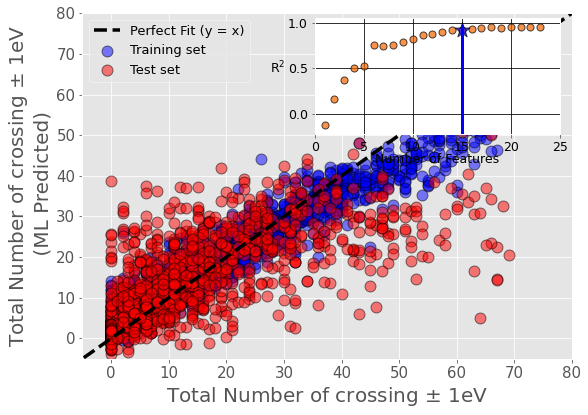

In [ ]:
#y_pred_train = best.predict(X_train)
#y_pred_test = best.predict(X_test)

x_ref_line = [-10, 90]
y_ref_line = [-10, 90]

x_ref_line_2 = np.linspace(-10, 60, 100)
y_ref_line_2 = np.linspace(-10, 60, 100)

# Print Result and Output figure
x11 = np.array(y_train1)
y11 = np.array(y_pred_train1)
x21 = np.array(y_test1)
y21 = np.array(y_pred_test1)

print('The rmse train:', mean_squared_error(y_train1, y_pred_train1) ** 0.5)
print('The rmse test:', mean_squared_error(y_test1, y_pred_test1) ** 0.5)
print('The MAE train:', mean_absolute_error(y_train1, y_pred_train1))
print('The MAE test:', mean_absolute_error(y_test1, y_pred_test1))
print('The R^2 train:', r2_score(y_train1, y_pred_train1))
print('The R^2 test:', r2_score(y_test1, y_pred_test1))

fig = plt.figure(figsize=(8.5, 6))

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.48, 0.62, 0.4, 0.27]) # inset axes

z1 = np.polyfit(x11, y11, 1)
p1 = np.poly1d(z1)

# Main Plot
axes1.plot(x_ref_line, y_ref_line, 'k--', linewidth=3.5, label='Perfect Fit (y = x)')

axes1.scatter(x11, y11, s=120, c='blue', alpha=0.5, edgecolors='k', linewidths=1, label='Training set')
axes1.scatter(x21, y21, s=120, c='red', alpha=0.5, edgecolors='k', linewidths=1, label='Test set')

axes1.set_xlabel('Total Number of crossing $\pm$ 1eV', fontsize = 20)
axes1.set_ylabel('Total Number of crossing $\pm$ 1eV \n (ML Predicted)', fontsize = 20)

axes1.set_xlim(-5, 80)
axes1.set_ylim(-5, 80)

axes1.tick_params(axis='both', labelsize = 15)
axes1.legend(loc='upper left', fontsize = 13, ncol = 1).get_frame().set_edgecolor('w')
axes1.grid(True)

# Inset plot
axes2.set_facecolor('w')
axes2.scatter(regressors, R2_train, s=50, c='#F56600', alpha=0.7, edgecolors='k', linewidths=1, label='MAE Training')
axes2.scatter(regressors[nf-1], R2_train[nf-1], marker ="*", s=250, c='b', alpha=0.7, edgecolors='k', linewidths=1)

axes2.axvline(x=regressors[nf-1], 
              ymin=0, 
              ymax=R2_train[nf-1], 
              color='b', 
              lw=3
             )

axes2.set_xlabel('Number of Features', fontsize = 12.5, labelpad=-1, c='k')
axes2.set_ylabel('R$^2$', fontsize = 12.5, rotation = 0, labelpad= 10, c='k')
axes2.tick_params(axis='both', labelsize = 12.5, labelcolor='k', grid_color='k',)
axes2.grid(True, c='k')

axes2.set_xlim(0, 25)
axes2.set_ylim(min(R2_train)-0.1, max(R2_train)+0.1);